In [1]:
# Task 5: Decision Trees and Random Forests

In [2]:
# importing libraries and loading data

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("C:/Users/HP/Downloads/archive (3)/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# exploring info of dataset

In [6]:
df.shape

(1025, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# selecting the features and target columns

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df[["age","thalach","exang"]]
X

,age,thalach,exang
0,52,168,0
1,53,155,1
2,70,125,1
3,61,161,0
4,62,106,0
...,...,...,...
1020,59,164,1
1021,60,141,1
1022,47,118,1
1023,50,159,0


In [43]:
y=df["target"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [44]:
# splitting the dataset

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [48]:
######################################################

In [49]:
# 1.Train a Decision Tree Classifier and visualize the tree.

In [50]:
# Decision Tree

In [51]:
# importing library

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [53]:
dtree=DecisionTreeClassifier(max_depth=4,random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [54]:
dtree_pred=dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [55]:
# accuracy score

In [56]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [57]:
acc_score=accuracy_score(y_test,dtree_pred)
acc_score

0.7219512195121951

In [58]:
# confusion matrix

In [59]:
cm=confusion_matrix(y_test,dtree_pred)
cm

array([[79, 23],
       [34, 69]], dtype=int64)

In [60]:
# classification report

In [61]:
classification_rep=classification_report(y_test,dtree_pred)
classification_rep

'              precision    recall  f1-score   support\n\n           0       0.70      0.77      0.73       102\n           1       0.75      0.67      0.71       103\n\n    accuracy                           0.72       205\n   macro avg       0.72      0.72      0.72       205\nweighted avg       0.72      0.72      0.72       205\n'

In [62]:
# plotting the tree

In [63]:
import matplotlib.pyplot as plt

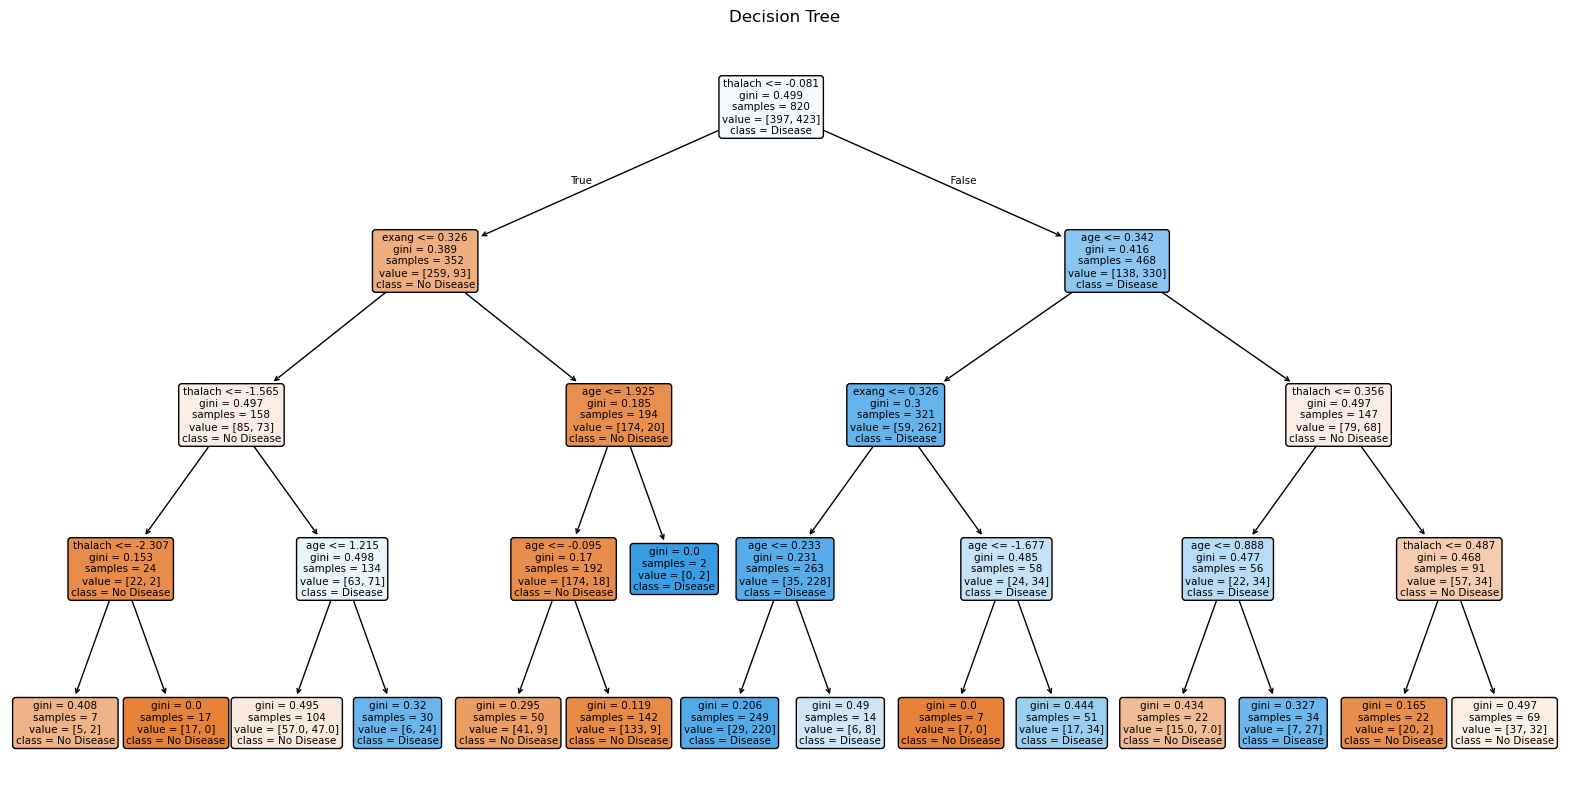

In [64]:
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names=X.columns,class_names=["No Disease","Disease"],filled=True,rounded=True)
plt.title("Decision Tree")
plt.show()

In [65]:
# 2.Analyze overfitting and control tree depth.

In [66]:
for d in range(1, 11):
    model=DecisionTreeClassifier(max_depth=d,random_state=0)
    model.fit(X_train,y_train)
    train_acc=model.score(X_train,y_train)
    test_acc=model.score(X_test,y_test)
    print(f"Depth={d} | Train: {train_acc:.2f} | Test: {test_acc:.2f}")

Depth=1 | Train: 0.72 | Test: 0.67
Depth=2 | Train: 0.73 | Test: 0.69
Depth=3 | Train: 0.76 | Test: 0.75
Depth=4 | Train: 0.79 | Test: 0.72
Depth=5 | Train: 0.81 | Test: 0.72
Depth=6 | Train: 0.85 | Test: 0.75
Depth=7 | Train: 0.88 | Test: 0.77
Depth=8 | Train: 0.89 | Test: 0.79
Depth=9 | Train: 0.91 | Test: 0.76
Depth=10 | Train: 0.93 | Test: 0.77


-> To analyze overfitting in a decision tree, I compare training and test accuracy.
-> If the training accuracy is very high but test accuracy is much lower, that indicates overfitting.
-> To control this, I use parameters like max_depth.
->For example, reducing max_depth limits how complex the tree can grow, which helps prevent overfitting.


In [68]:
# 3.Train a Random Forest and compare accuracy.

In [69]:
# random forest

In [70]:
# importing library

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [73]:
rf_pred=rf.predict(X_test)
rf_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [74]:
# accuracy score

In [75]:
accuracy=accuracy_score(y_test,rf_pred)
accuracy

0.8146341463414634

In [76]:
# confusion matrix

In [77]:
cm=confusion_matrix(y_test,rf_pred)
cm

array([[84, 18],
       [20, 83]], dtype=int64)

In [78]:
# classification report

In [79]:
report=classification_report(y_test,rf_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82       102\n           1       0.82      0.81      0.81       103\n\n    accuracy                           0.81       205\n   macro avg       0.81      0.81      0.81       205\nweighted avg       0.81      0.81      0.81       205\n'

In [80]:
# plotting

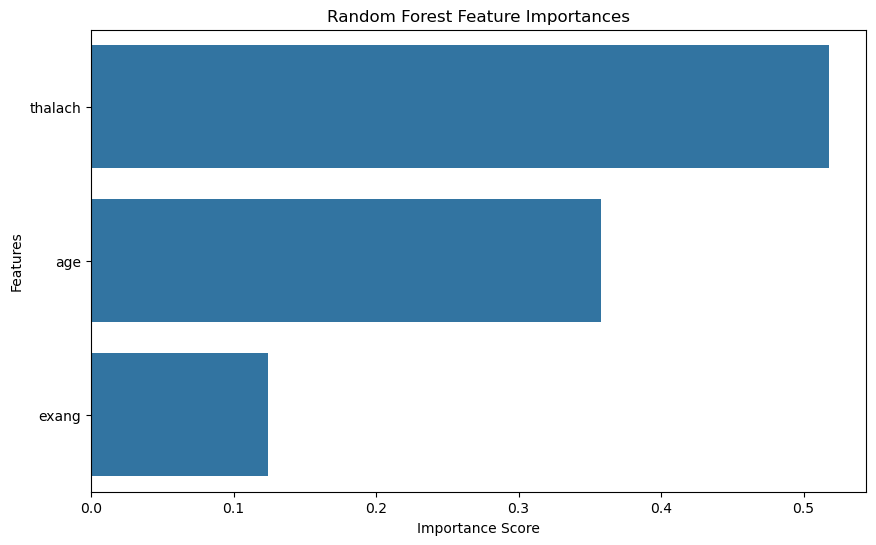

In [86]:
import seaborn as sns
feat_imp=pd.Series(rf.feature_importances_,index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.sort_values(ascending=False),y=feat_imp.sort_values(ascending=False).index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [87]:
# comparing accuracy of random forest and decision tree

In [89]:
print(f"Decision Tree Accuracy: {acc_score:.2f}")
print(f"Random Forest Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.72
Random Forest Accuracy: 0.81


In [90]:
#  4.Interpret feature importances.

In [ ]:
# decision tree feature importance

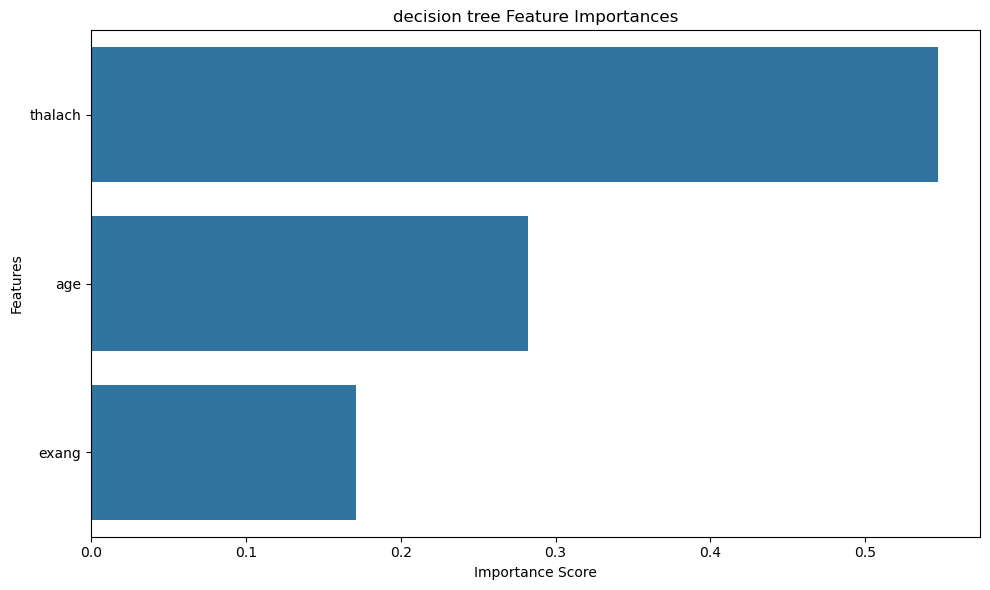

In [94]:
importances=dtree.feature_importances_
feature_names=X.columns
feat_imp=pd.Series(importances,index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp,y=feat_imp.index,hue=None,legend=False)
plt.title("decision tree Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
# random forest feature importance

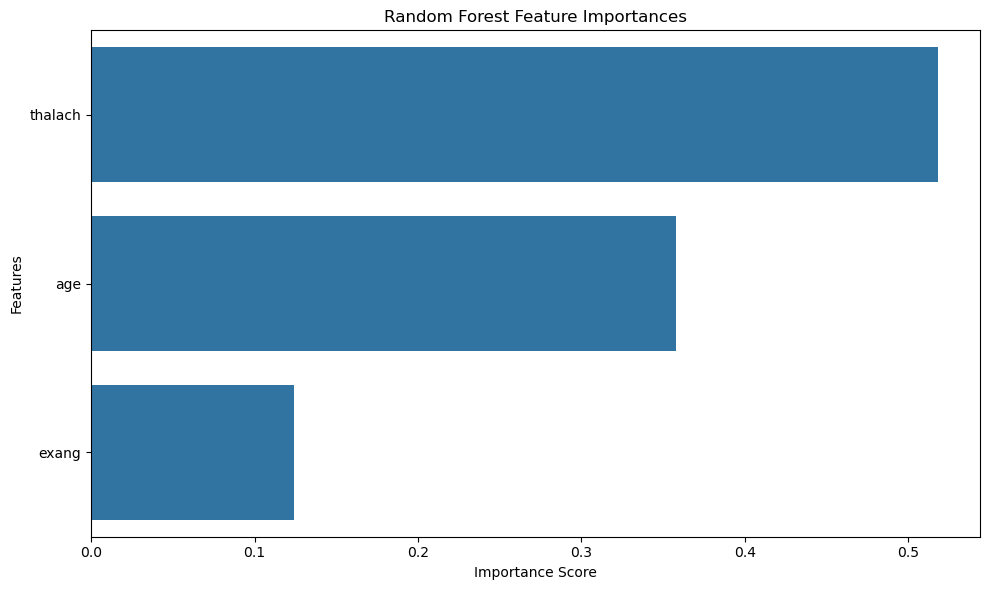

In [93]:
importances=rf.feature_importances_
feature_names=X.columns
feat_imp=pd.Series(importances,index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp,y=feat_imp.index,hue=None,legend=False)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
#  5.Evaluate using cross-validation.

In [95]:
# decision tree

In [99]:
from sklearn.model_selection import cross_val_score
tree=DecisionTreeClassifier(random_state=42)
cv_scores=cross_val_score(dtree,X,y.to_numpy(),cv=5,scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average Accuracy:",np.mean(cv_scores).round(4))

Cross-validation scores: [0.76585366 0.82439024 0.74634146 0.69756098 0.73658537]
Average Accuracy: 0.7541


In [100]:
# random forest

In [101]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=100,random_state=42)
cv_scores=cross_val_score(rf,X,y.to_numpy(),cv=5,scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores).round(4))


Cross-validation scores: [0.9804878  0.97073171 0.95121951 0.97560976 0.97073171]
Average Accuracy: 0.9698
